In [4]:
import numpy as np
import matplotlib.pyplot as plt

In [5]:
def czy_moga_wierzch(zbior):
    pass


In [6]:
def linear_f(x, a, b):
    return a * x + b

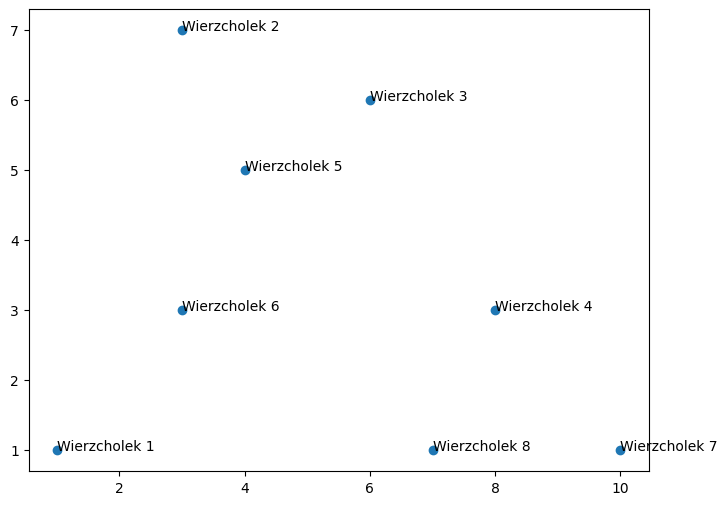

In [7]:
zbior = {
    "Wierzcholek 1": (1, 1),
    "Wierzcholek 2": (3, 7),
    "Wierzcholek 3": (6, 6),
    "Wierzcholek 4": (8, 3),
    "Wierzcholek 5": (4, 5),
    "Wierzcholek 6": (3, 3),
    "Wierzcholek 7": (10, 1),
    "Wierzcholek 8": (7, 1),
}

plt.figure(figsize=(8, 6))
plt.scatter([x for x, _ in zbior.values()], [y for _, y in zbior.values()])
for nazwa, (x, y) in zbior.items():
    plt.text(x, y, nazwa)

plt.show()

In [8]:
for nazwa, cords in zbior.items():
    print(f'{nazwa}: {cords}')
    print(cords[0], cords[1])

Wierzcholek 1: (1, 1)
1 1
Wierzcholek 2: (3, 7)
3 7
Wierzcholek 3: (6, 6)
6 6
Wierzcholek 4: (8, 3)
8 3
Wierzcholek 5: (4, 5)
4 5
Wierzcholek 6: (3, 3)
3 3
Wierzcholek 7: (10, 1)
10 1
Wierzcholek 8: (7, 1)
7 1


In [9]:
zbior_copy = zbior.copy()

In [10]:
for nazwa_A, cords_A in zbior.items():
    zbior_prawd = []
    zbior_copy = zbior.copy()
    zbior_copy.pop(nazwa_A)
    
    for nazwa_B, cords_B in zbior_copy.items():
        zbior_copy_copy = zbior_copy.copy()
        zbior_copy_copy.pop(nazwa_B)

        if cords_B[0] == cords_A[0]:
            differences = np.array([x - cords_A[0] for x, _ in zbior_copy_copy.values()])
            if all(differences >= 1e-6) or all(differences <= 1e-6):
                
                mask = (np.abs(differences) < 1e-5)
                if mask.any():
                    wewnatrz = []
                    for nazwa_C in mask:
                        _, y = zbior_copy_copy[nazwa_C]
                        if cords_A[1] < y < cords_B[1] or cords_B[1] < y < cords_A[1]:
                            wewnatrz.append(True)
                        else:
                            wewnatrz.append(False)
                    if all(wewnatrz):
                        zbior_prawd.append(True)
                        continue
                    else:
                        zbior_prawd.append(False)
                        continue
                
                zbior_prawd.append(True)
        else:
            a = (cords_B[1] - cords_A[1]) / (cords_B[0] - cords_A[0])
            
            b = cords_A[1] - a * cords_A[0]
            values = [linear_f(x, a, b) for x, _ in zbior_copy_copy.values()]
            values_y = [y for _, y in zbior_copy_copy.values()]
            
            differences = np.array(values_y) - np.array(values)
            
            # print(differences)
            # print(a, b)
            
            if all(differences >= 1e-2) or all(differences <= 1e-2):
                mask = (np.abs(differences) < 1e-5)
                if mask.any():
                    wewnatrz = []
                    for nazwa_C in mask:
                        x, y = zbior_copy_copy[nazwa_C]
                        if cords_A[0] < x < cords_B[0] or cords_B[0] < x < cords_A[0]:
                            wewnatrz.append(True)
                        elif cords_A[1] < x < cords_B[1] or cords_B[1] < x < cords_A[1]: # to w sumie do wyjebania, bo to sie sprawdza w pierwszej czesci
                            wewnatrz.append(True)
                        else:
                            wewnatrz.append(False)
                            
                    if all(wewnatrz):
                        zbior_prawd.append(True)
                        continue
                    
                    else:
                        zbior_prawd.append(False)
                        continue

                zbior_prawd.append(True)
                
            else:
                zbior_prawd.append(False)
            
        
            # print(np.all((np.array(values) > 0) or (np.array(values) < 0)))
        # print(np.all((np.array(values) > 0) or (np.array(values) < 0)))
        # print(f'Prosta przechodzaca przez {nazwa_A} i {nazwa_B} ma rownanie y = {a}x + {b}')
    # print(zbior_prawd)
    if any(zbior_prawd):
        print(f'Wierzcholek {nazwa_A} moze byc wierzcholkiem otoczki')

Wierzcholek Wierzcholek 1 moze byc wierzcholkiem otoczki
Wierzcholek Wierzcholek 2 moze byc wierzcholkiem otoczki
Wierzcholek Wierzcholek 3 moze byc wierzcholkiem otoczki
Wierzcholek Wierzcholek 7 moze byc wierzcholkiem otoczki


In [11]:

[1, 6, 3, 0. ,-7 ,1][any(np.abs(np.array([1, 6, 3, 0. ,-7 ,1])) < 1e-5)]

6

In [13]:
# arr = np.array([1, 0., 3, 1. ,-7])
# mask = (np.abs(np.array(arr)) < 1e-5)
# np.array(list(zbior.keys()))[mask]

In [14]:
if mask.any():
    print("tak")

tak


In [15]:
np.array([1, 0., 3, 0. ,-7 ,1]) < -1e-5

array([False, False, False, False,  True, False])

In [16]:
np.array()

TypeError: array() missing required argument 'object' (pos 0)

In [17]:
lista_wierz = np.array(list(zbior.keys()))[mask]

IndexError: boolean index did not match indexed array along axis 0; size of axis is 8 but size of corresponding boolean axis is 5

In [18]:
kord = [zbior[nazwa] for nazwa in lista_wierz]
kord

NameError: name 'lista_wierz' is not defined

In [19]:
def czy_moga_wierzch(zbior: dict, rys = False):
    def linear_f(x, a, b):
        return a * x + b
    
    wierzcholki = {}
    
    for nazwa_A, cords_A in zbior.items():
        zbior_prawd = []
        zbior_copy = zbior.copy()
        zbior_copy.pop(nazwa_A)
        
        for nazwa_B, cords_B in zbior_copy.items():
            zbior_copy_copy = zbior_copy.copy()
            zbior_copy_copy.pop(nazwa_B)

            if cords_B[0] == cords_A[0]:
                differences = np.array([x - cords_A[0] for x, _ in zbior_copy_copy.values()])
                if all(differences >= 1e-6) or all(differences <= 1e-6):
                    
                    mask = (np.abs(differences) < 1e-5)
                    if mask.any():
                        wewnatrz = []
                        for nazwa_C in mask:
                            _, y = zbior_copy_copy[nazwa_C]
                            if cords_A[1] < y < cords_B[1] or cords_B[1] < y < cords_A[1]:
                                wewnatrz.append(True)
                            else:
                                wewnatrz.append(False)
                        if all(wewnatrz):
                            zbior_prawd.append(True)
                            continue
                        else:
                            zbior_prawd.append(False)
                            continue
                    
                    zbior_prawd.append(True)
            else:
                a = (cords_B[1] - cords_A[1]) / (cords_B[0] - cords_A[0])
                
                b = cords_A[1] - a * cords_A[0]
                values = [linear_f(x, a, b) for x, _ in zbior_copy_copy.values()]
                values_y = [y for _, y in zbior_copy_copy.values()]
                
                differences = np.array(values_y) - np.array(values)
                
                # print(differences)
                # print(a, b)
                
                if all(differences >= 1e-2) or all(differences <= 1e-2):
                    mask = (np.abs(differences) < 1e-5)
                    if mask.any():
                        wewnatrz = []
                        for nazwa_C in mask:
                            x, y = zbior_copy_copy[nazwa_C]
                            if cords_A[0] < x < cords_B[0] or cords_B[0] < x < cords_A[0]:
                                wewnatrz.append(True)
                            elif cords_A[1] < x < cords_B[1] or cords_B[1] < x < cords_A[1]: # to w sumie do wyjebania, bo to sie sprawdza w pierwszej czesci
                                wewnatrz.append(True)
                            else:
                                wewnatrz.append(False)
                                
                        if all(wewnatrz):
                            zbior_prawd.append(True)
                            continue
                        
                        else:
                            zbior_prawd.append(False)
                            continue

                    zbior_prawd.append(True)
                    
                else:
                    zbior_prawd.append(False)
                
            
                # print(np.all((np.array(values) > 0) or (np.array(values) < 0)))
            # print(np.all((np.array(values) > 0) or (np.array(values) < 0)))
            # print(f'Prosta przechodzaca przez {nazwa_A} i {nazwa_B} ma rownanie y = {a}x + {b}')
        # print(zbior_prawd)
        
        if any(zbior_prawd):
            # print(f'Wierzcholek {nazwa_A} moze byc wierzcholkiem otoczki')
            wierzcholki[nazwa_A] = cords_A
            
    if rys:
        plt.figure(figsize=(8, 6))
        plt.scatter([x for x, _ in zbior.values()], [y for _, y in zbior.values()], color='blue', label='Punkty oryginalne')
        plt.scatter([x for x, _ in wierzcholki.values()], [y for _, y in wierzcholki.values()], color='red', label='Wierzcholki otoczki')
        for nazwa, (x, y) in zbior.items():
            plt.text(x, y, nazwa)
        plt.legend()
        plt.show()
    
    return wierzcholki
            

In [20]:
def sortowanie_katowe(wierzcholki: dict):
    points = np.array(list(wierzcholki.values()))
    centroid = np.mean(points, axis=0)
    angles = np.arctan2(points[:, 1] - centroid[1], points[:, 0] - centroid[0])
    sorted_indices = np.argsort(angles)
    return points[sorted_indices]
    
    
sortowanie_katowe(zbior)

array([[ 3,  3],
       [ 1,  1],
       [ 7,  1],
       [10,  1],
       [ 8,  3],
       [ 6,  6],
       [ 3,  7],
       [ 4,  5]])

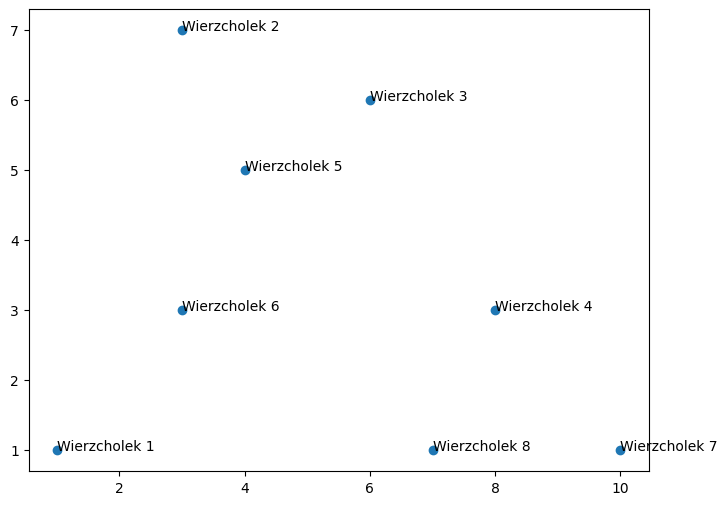

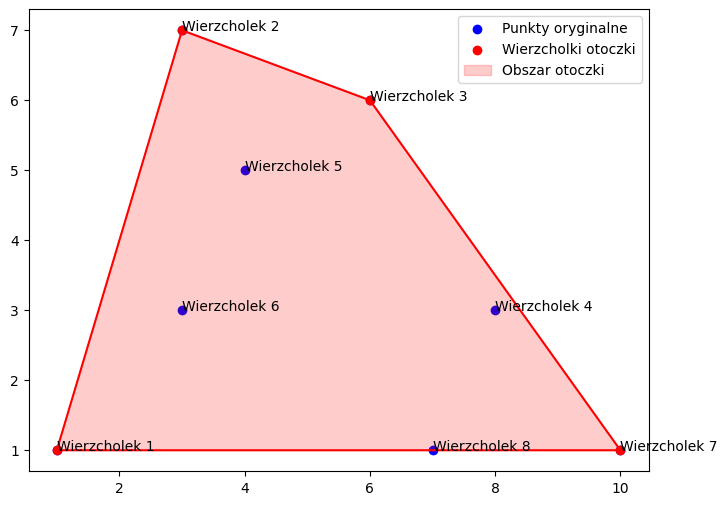

In [24]:
zbior = {
    "Wierzcholek 1": (1, 1),
    "Wierzcholek 2": (3, 7),
    "Wierzcholek 3": (6, 6),
    "Wierzcholek 4": (8, 3),
    "Wierzcholek 5": (4, 5),
    "Wierzcholek 6": (3, 3),
    "Wierzcholek 7": (10, 1),
    "Wierzcholek 8": (7, 1),
}

plt.figure(figsize=(8, 6))
plt.scatter([x for x, _ in zbior.values()], [y for _, y in zbior.values()])
for nazwa, (x, y) in zbior.items():
    plt.text(x, y, nazwa)

plt.show()

def czy_moga_wierzch(zbior: dict, rys = False):
    
    """Funkcja do sprawdzania które punkty na R2 moga byc wierzchołkami otoczki wypuklej zbudowanej na tych pkt, najprawdopodobniej tragicznie
    wydajna (nie bylo testow), ale ma naśladować działanie monotone chain. Co ciekawe, po odkryciu czegoś takiego jak sortowanie katowe, mozna bylo bardziej zoptymalizować miejsca, w których sprawdzam czy punkty są współliniowe, ale to może robota na kiedyś.
    """
    
    def linear_f(x, a, b):
        return a * x + b
    
    
    def sortowanie_katowe(wierzcholki: dict):
        """Funkcja do sortowania katowego, wykorzystuje funkcje z numpy arctan2, ktora zwraca katy w radianach kąt wektora kierunkowego zbudowanego z centroidu (srednia arytmetyczna wspolrzednych punktow) i konkretnego punktu. 

        Args:
            wierzcholki (dict): _description_

        Returns:
            _type_: zwraca posorotowane punkty wierzcholkow w kolejnosci "katowej"
        """
        points = np.array(list(wierzcholki.values()))
        centroid = np.mean(points, axis=0)
        angles = np.arctan2(points[:, 1] - centroid[1], points[:, 0] - centroid[0])
        sorted_indices = np.argsort(angles)
        return points[sorted_indices]
    
        #https://www.algorytm.edu.pl/olimpiada-informatyczna/katowe-zamiatanie.html mocne gowno, do pozniejszego mocniejszego przyswojenia
        # z researchu wynika, ze zamiast contangesa lepiej uzyc atan2, ewentualnie np.angle, ale to jeden chuj, mozna kiedys potestowac
    
    
    wierzcholki = {}
    
    for nazwa_A, cords_A in zbior.items():
        zbior_prawd = []
        zbior_copy = zbior.copy()
        zbior_copy.pop(nazwa_A)
        
        for nazwa_B, cords_B in zbior_copy.items():
            zbior_copy_copy = zbior_copy.copy()
            zbior_copy_copy.pop(nazwa_B)
            
            # tu zalatwiamy kwestie kiedy punkty leża na prostek wertykalnej
            if cords_B[0] == cords_A[0]:
                differences = np.array([x - cords_A[0] for x, _ in zbior_copy_copy.values()])
                if all(differences >= 1e-6) or all(differences <= 1e-6):
                    
                    mask = (np.abs(differences) < 1e-5)
                    #sprawdzenie wspoliniowosci
                    if mask.any():
                        wewnatrz = []
                        for nazwa_C in mask:
                            _, y = zbior_copy_copy[nazwa_C]
                            if cords_A[1] < y < cords_B[1] or cords_B[1] < y < cords_A[1]:
                                wewnatrz.append(True)
                            else:
                                wewnatrz.append(False)
                        if all(wewnatrz):
                            zbior_prawd.append(True)
                            continue
                        else:
                            zbior_prawd.append(False)
                            continue
                    
                    zbior_prawd.append(True)
            # tu cala reszte
            else:
                a = (cords_B[1] - cords_A[1]) / (cords_B[0] - cords_A[0])
                
                b = cords_A[1] - a * cords_A[0]
                values = [linear_f(x, a, b) for x, _ in zbior_copy_copy.values()]
                values_y = [y for _, y in zbior_copy_copy.values()]
                
                differences = np.array(values_y) - np.array(values)
                
                # print(differences)
                # print(a, b)
                
                if all(differences >= 1e-2) or all(differences <= 1e-2):
                    #sprawdzenie wspoliniowosci
                    mask = (np.abs(differences) < 1e-5)
                    if mask.any():
                        wewnatrz = []
                        for nazwa_C in mask:
                            x, y = zbior_copy_copy[nazwa_C]
                            if cords_A[0] < x < cords_B[0] or cords_B[0] < x < cords_A[0]:
                                wewnatrz.append(True)
                            elif cords_A[1] < x < cords_B[1] or cords_B[1] < x < cords_A[1]: # to w sumie do wyjebania, bo to sie sprawdza w pierwszej czesci
                                wewnatrz.append(True)
                            else:
                                wewnatrz.append(False)
                                
                        if all(wewnatrz):
                            zbior_prawd.append(True)
                            continue
                        
                        else:
                            zbior_prawd.append(False)
                            continue

                    zbior_prawd.append(True)
                    
                else:
                    zbior_prawd.append(False)
                
            
                # print(np.all((np.array(values) > 0) or (np.array(values) < 0)))
            # print(np.all((np.array(values) > 0) or (np.array(values) < 0)))
            # print(f'Prosta przechodzaca przez {nazwa_A} i {nazwa_B} ma rownanie y = {a}x + {b}')
        # print(zbior_prawd)
        
        if any(zbior_prawd):
            # print(f'Wierzcholek {nazwa_A} moze byc wierzcholkiem otoczki')
            wierzcholki[nazwa_A] = cords_A
            
    if rys:
        sortowane = sortowanie_katowe(wierzcholki)
        
        x_sorted = [x for x, _ in sortowane] + [sortowane[0][0]] #domkniecie wielokata
        y_sorted = [y for _, y in sortowane] + [sortowane[0][1]] #to samo
        
        plt.figure(figsize=(8, 6))
        plt.scatter([x for x, _ in zbior.values()], [y for _, y in zbior.values()], color='blue', label='Punkty oryginalne')
        plt.scatter([x for x, _ in sortowane], [y for _, y in sortowane], color='red', label='Wierzcholki otoczki')
        plt.plot(x_sorted, y_sorted, color='red', linestyle='-')
        plt.fill(x_sorted, y_sorted, color='red', alpha=0.2, label='Obszar otoczki')
        for nazwa, (x, y) in zbior.items():
            plt.text(x, y, nazwa)
        plt.legend()
        plt.show()
    
    return wierzcholki
            

do_sortowania = czy_moga_wierzch(zbior, True)

In [22]:
do_sortowania, sortowanie_katowe(do_sortowania)

({'Wierzcholek 1': (1, 1),
  'Wierzcholek 2': (3, 7),
  'Wierzcholek 3': (6, 6),
  'Wierzcholek 7': (10, 1)},
 array([[ 1,  1],
        [10,  1],
        [ 6,  6],
        [ 3,  7]]))

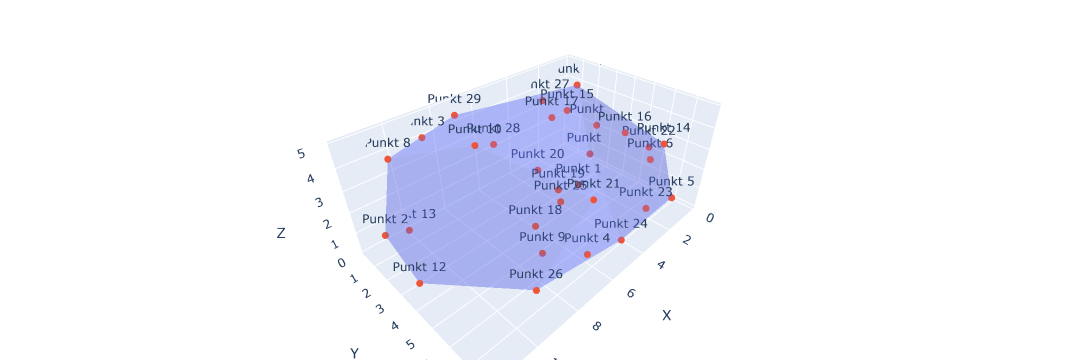

In [2]:
import numpy as np
from scipy.spatial import ConvexHull
import plotly.graph_objects as go

# --- dane (jak u Ciebie) ---
zbior3 = {
    "A": (1, 1, 0),
    "B": (3, 7, 2),
    "C": (6, 6, 1),
    "D": (8, 3, 0),
    "E": (4, 5, 3),
    "F": (3, 3, 2),
    "G": (10, 1, 0),
    "H": (7, 1, 1),
}

np.random.seed(42)  # dla powtarzalności
n = 30
xs = np.random.uniform(0, 12, n)
ys = np.random.uniform(0, 8, n)
zs = np.random.uniform(0, 5, n)

zbior3 = {f"Punkt {i+1}": (float(xs[i]), float(ys[i]), float(zs[i])) for i in range(n)}

names = list(zbior3.keys())
pts = np.array(list(zbior3.values()), dtype=float)  # (n,3)

# --- otoczka 3D (Qhull) ---
hull = ConvexHull(pts)

# siatka trójkątów (simplices) -> Mesh3d
I = hull.simplices[:, 0]
J = hull.simplices[:, 1]
K = hull.simplices[:, 2]

mesh = go.Mesh3d(
    x=pts[:, 0], y=pts[:, 1], z=pts[:, 2],
    i=I, j=J, k=K,
    opacity=0.25,
    flatshading=True,
    name="Otoczka",
    hoverinfo="skip"
)

# punkty
scat = go.Scatter3d(
    x=pts[:, 0], y=pts[:, 1], z=pts[:, 2],
    mode="markers+text",
    text=names,
    textposition="top center",
    marker=dict(size=4),
    name="Punkty"
)

fig = go.Figure(data=[mesh, scat])
fig.update_layout(
    scene=dict(
        xaxis_title="X",
        yaxis_title="Y",
        zaxis_title="Z",
        aspectmode="data"
    ),
    margin=dict(l=0, r=0, t=0, b=0)
)

fig.show()

IndexError: index 2 is out of bounds for axis 1 with size 2

Przykładowe punkty (pierwsze 5):
Punkt 1 (4.49448142616835, 4.860358815211507, 1.9433864484474102)
Punkt 2 (11.408571676918994, 1.3641929894983322, 1.3567451588694794)
Punkt 3 (8.783927301736862, 0.5204127438822361, 4.143687545759647)
Punkt 4 (7.183901810364439, 7.591084298026666, 1.7837666334679465)
Punkt 5 (1.8722236853092382, 7.725056264596475, 1.4046725484369038)


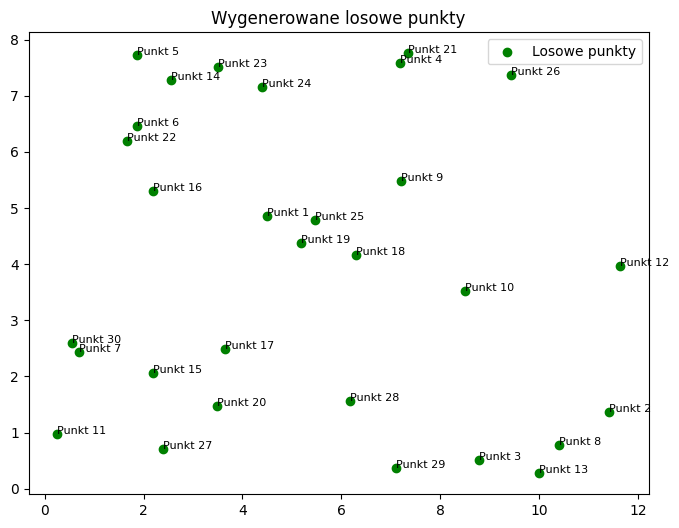

In [34]:
# --- Generowanie dodatkowych losowych punktów ---
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(42)  # dla powtarzalności
n = 30
xs = np.random.uniform(0, 12, n)
ys = np.random.uniform(0, 8, n)
zs = np.random.uniform(0, 5, n)

zbior_losowe = {f"Punkt {i+1}": (float(xs[i]), float(ys[i]), float(zs[i])) for i in range(n)}

print('Przykładowe punkty (pierwsze 5):')
for i, (k, v) in enumerate(zbior_losowe.items()):
    if i >= 5:
        break
    print(k, v)

plt.figure(figsize=(8, 6))
plt.scatter(xs, ys, color='green', label='Losowe punkty')
for nazwa, (x, y, z) in zbior_losowe.items():
    plt.text(x, y, nazwa, fontsize=8)
plt.title('Wygenerowane losowe punkty')
plt.legend()
plt.show()
